In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from root_pandas import read_root
%run functions.ipynb
%run constants.ipynb

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.14/06


In [2]:
def getData(inputFiles):
    cols = []
    scalar = []
    scalar.append('evid')
    scalar.append('ncharged')
    scalar.append('nneutral')
    scalar.append('pt_jet')
    scalar.append('p_jet')
    scalar.append('eta_jet')
    scalar.append('pt_electron')
    scalar.append('Q2')
    scalar.append('W2')
    scalar.append('x')
    scalar.append('y')
    scalar.append('xsec')
    scalar.append('ntrials')
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print 'Processed', inputFilename, 'in',  end-start, 'seconds'
    return pd.concat([x for x in dataframes])

In [3]:
files = ['$HOME/fjpythia/output/723.root']
a = getData(files)

Processed $HOME/fjpythia/output/723.root in 66.4650690556 seconds


In [11]:
d = applyCut(a, '0.01 < y < 0.85', '0.01 < y < 0.85')
d = applyCut(d, 'W2 > 4', 'W2 > 4')
d = applyCut(d, 'p_jet > 4', 'p_jet > 4')
d = applyCut(d, 'Q2 > 1', 'Q2 > 1')
d.eval('mult = nneutral + ncharged', inplace=True)
d1 = applyCut(d, 'pt_jet > 4 and pt_jet < 5', '4 < pt_jet < 5')
d2 = applyCut(d, 'pt_jet > 9 and pt_jet < 10', '9 < pt_jet < 10')
d3 = applyCut(d, 'pt_jet > 20 and pt_jet < 21', '20 < pt_jet < 21')

0.01 < y < 0.85 28989288  fraction kept: 66.1
W2 > 4 28989288  fraction kept: 100.0
p_jet > 4 6775902  fraction kept: 23.4
Q2 > 1 6775902  fraction kept: 100.0
4 < pt_jet < 5 358687  fraction kept: 5.3
9 < pt_jet < 10 40287  fraction kept: 0.6
20 < pt_jet < 21 1322  fraction kept: 0.0


In [61]:
def plot(df_array, label_array, color_array):
    for i in range(0,len(df_array)):
        plt.hist(df_array[i]['mult'], label='$ '+ label_array[i] + ' GeV$', range=(0,20), bins=20, histtype='step', fill=False, stacked=True, normed=True, color=color_array[i])

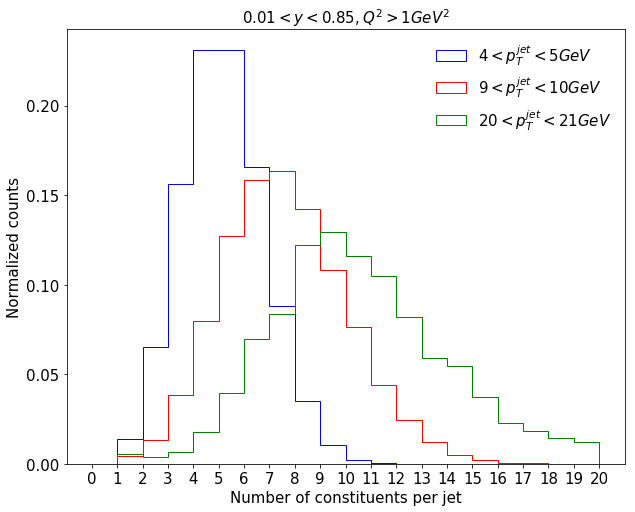

In [70]:
fig = plt.figure(figsize=(10,8))
plot([d1,d2,d3], ['4 < p_T^{jet} < 5','9 < p_T^{jet} < 10','20 < p_T^{jet} < 21'], ['b','r','g'])
plt.title('$ 0.01 < y < 0.85, Q^2 > 1 GeV^2$', fontsize=15)
plt.xlabel('Number of constituents per jet', fontsize=15)
plt.ylabel('Normalized counts', fontsize=15)
plt.xticks(np.arange(21), fontsize=15)
plt.yticks(fontsize=15)
plt.legend(prop={'size': 15}, frameon=False, loc='best')

In [5]:
colorArray = ['b','r','g','m','lawngreen','orange','indianred','skyblue']
labelArray = ['$\eta_{jet} < -3.0$','$-3.0 < \eta_{jet} < -2.0$','$-2.0 < \eta_{jet} < -1.0$','$-1.0 < \eta_{jet} < 0$',\
              '$0 < \eta_{jet} < 1.0$', '$1.0 < \eta_{jet} < 2.0$', '$2.0 < \eta_{jet} < 3.0$', '$\eta_{jet} > 3.0$']
etaedges = [-4.5, -3.0, -2.0, -1.0, 0, 1, 2, 3, 4.5]
ptedges = np.arange(26)
large_etaedges = [-4.5, 4.5]

In [4]:
a.eval('mult = nneutral + ncharged', inplace=True)
d = applyCut(a, 'Q2 > 10', 'Q2 > 10')
d = applyCut(d, 'y > 0.01 and y < 0.85', '0.01 < y < 0.85')
d = applyCut(d, 'W2 > 4', 'W2 > 4')
d = applyCut(d, 'p_jet > 5', 'p_jet > 5')

ds = partitionEtaPt(d, etaedges, ptedges)

Q2 > 10 4856516  fraction kept: 11.1
0.01 < y < 0.85 4477083  fraction kept: 92.2
W2 > 4 4477083  fraction kept: 100.0
p_jet > 5 1132129  fraction kept: 25.3


NameError: name 'etaedges' is not defined

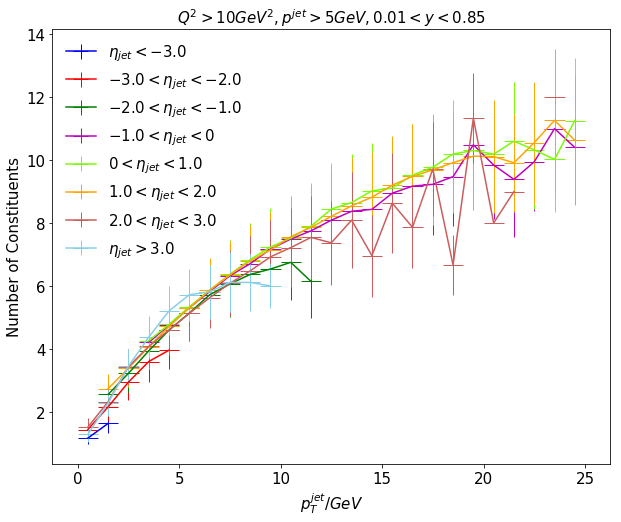

In [25]:
fig = plt.figure(figsize=(10,8))
for i in range(len(etaedges)-1):
    x = []*(len(ptedges)-1)
    y = []*(len(ptedges)-1)
    yerr = []*(len(ptedges)-1)
    for j in range(len(ptedges)-1):
        df = ds[i][j]
        x.append((((float)(ptedges[j])) + ptedges[j+1])/2)
        y.append(np.mean(df['mult']))
        xerr = getInterval(ptedges)/2
        yerr.append(np.std(df['mult'])/2)
    plt.errorbar(x, y, xerr = xerr, yerr = yerr, color=colorArray[i], elinewidth=1, label=labelArray[i])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('$p_T^{jet} / GeV$', fontsize=15)
plt.ylabel('Number of Constituents', fontsize=15)
plt.legend(prop={'size': 15}, frameon=False, loc='upper left')
plt.title('$ Q^2 > 10 GeV^2, p^{jet} > 5 GeV, 0.01 < y < 0.85$', fontsize=15)
plt.savefig('images/num.pdf', bbox_inches='tight')

Cuts: Q2 > 10 GeV^2, p_jet > 5 GeV, 0.01 < y < 0.85, W2 > 4 GeV^2


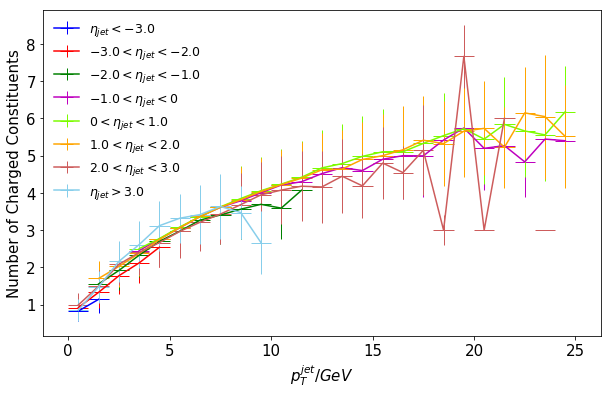

In [22]:
fig = plt.figure(figsize=(10,6))
for i in range(len(etaedges)-1):
    x = []*(len(ptedges)-1)
    y = []*(len(ptedges)-1)
    yerr = []*(len(ptedges)-1)
    for j in range(len(ptedges)-1):
        df = ds[i][j]
        x.append((((float)(ptedges[j])) + ptedges[j+1])/2)
        y.append(np.mean(df['ncharged']))
        xerr = getInterval(ptedges)/2
        yerr.append(np.std(df['ncharged'])/2)
    plt.errorbar(x, y, xerr = xerr, yerr = yerr, color=colorArray[i], elinewidth=1, label=labelArray[i])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('$p_T^{jet} / GeV$', fontsize=15)
plt.ylabel('Number of Charged Constituents', fontsize=15)
plt.legend(prop={'size': 12.5}, frameon=False, loc='upper left')
print 'Cuts: Q2 > 10 GeV^2, p_jet > 5 GeV, 0.01 < y < 0.85, W2 > 4 GeV^2'

In [6]:
ds_large = partitionEtaPt(d, large_etaedges, ptedges)


-4.5 < eta_jet < 4.5 

-4.5 < eta_jet < 4.5 1132129  fraction kept: 100.0
0 < pt_jet < 1 334939  fraction kept: 29.6
1 < pt_jet < 2 196280  fraction kept: 17.3
2 < pt_jet < 3 104900  fraction kept: 9.3
3 < pt_jet < 4 119187  fraction kept: 10.5
4 < pt_jet < 5 111847  fraction kept: 9.9
5 < pt_jet < 6 91706  fraction kept: 8.1
6 < pt_jet < 7 56668  fraction kept: 5.0
7 < pt_jet < 8 36053  fraction kept: 3.2
8 < pt_jet < 9 23657  fraction kept: 2.1
9 < pt_jet < 10 16343  fraction kept: 1.4
10 < pt_jet < 11 11378  fraction kept: 1.0
11 < pt_jet < 12 7936  fraction kept: 0.7
12 < pt_jet < 13 5767  fraction kept: 0.5
13 < pt_jet < 14 4018  fraction kept: 0.4
14 < pt_jet < 15 2950  fraction kept: 0.3
15 < pt_jet < 16 2236  fraction kept: 0.2
16 < pt_jet < 17 1661  fraction kept: 0.1
17 < pt_jet < 18 1210  fraction kept: 0.1
18 < pt_jet < 19 925  fraction kept: 0.1
19 < pt_jet < 20 679  fraction kept: 0.1
20 < pt_jet < 21 492  fraction kept: 0.0
21 < pt_jet < 22 370  fraction kept: 0.0
22 < 

This matches the plot generated using 924.root


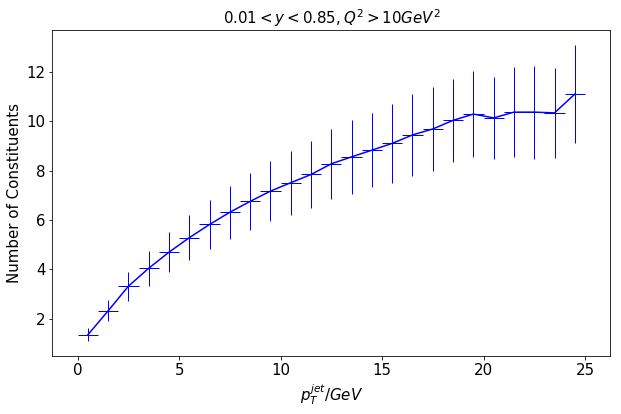

In [8]:
fig = plt.figure(figsize=(10,6))
for i in range(len(large_etaedges)-1):
    x = []*(len(ptedges)-1)
    y = []*(len(ptedges)-1)
    yerr = []*(len(ptedges)-1)
    for j in range(len(ptedges)-1):
        df = ds_large[i][j]
        x.append((((float)(ptedges[j])) + ptedges[j+1])/2)
        y.append(np.mean(df['mult']))
        xerr = getInterval(ptedges)/2
        yerr.append(np.std(df['mult'])/2)
    plt.errorbar(x, y, xerr = xerr, yerr = yerr, color=colorArray[i], elinewidth=1, label=labelArray[i])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('$p_T^{jet} / GeV$', fontsize=15)
plt.ylabel('Number of Constituents', fontsize=15)
plt.title('$ 0.01 < y < 0.85, Q^2 > 10 GeV^2$', fontsize=15)
print 'This matches the plot generated using 924.root'